In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

## Read Data

In [4]:
# Global variables
demo_war_df = pd.read_csv('demo_war_table.csv')
war_df = pd.read_csv('war_table.csv')
subjective_df = pd.read_csv('subjective_table.csv')
objective_df = pd.read_csv('objective_task_table.csv')

## Color Palette

In [25]:
colors = ['plum','violet','royalblue','lightblue','aquamarine','seagreen','mediumseagreen','lightgreen',
          'gold','wheat','coral','salmon','tomato','hotpink']

colors_warbar = ['#a3c4f3','#8eecf5','#a5ffd6','#fff3b0','#fbc4ab']

mental_color = {'purple':['#8c07dd','#B333E9','#CB5DF1','#DC93F6','#EABFFA'],
                'blue':['#0d47a1','#1976d2','#2196f3','#90caf9','#e3f2fd'],
                'turquoise':['#008083','#39a2ae','#44e5e7','#73fbd3','#c2ffee'],
                'green':['#3DA35D','#96E072'],
                'yellow':['#F9DC5C','#FCEFB4'],
                'orange':['#f3722c','#f79d65','#f9c74f'],
                'red':['#EF3C2D','#F26A4F','#eaa8a8'],
                'pink':['#FF4D6D','#FF8FA3','#ffe5ec']}

# Demographichs

In [10]:
female_freq = len(demo_war_df.loc[demo_war_df['gender']=='female'])
male_freq = len(demo_war_df.loc[demo_war_df['gender']=='male'])
adhd_freq = len(demo_war_df.loc[demo_war_df['prior_diagnosis']=='ADHD'])
dass_freq = len(demo_war_df.loc[demo_war_df['prior_diagnosis']=='DASS'])
ptsd_freq = len(demo_war_df.loc[demo_war_df['prior_diagnosis']=='PTSD'])
other_freq = len(demo_war_df.loc[demo_war_df['prior_diagnosis']=='other'])
no_freq = len(demo_war_df.loc[demo_war_df['prior_diagnosis']=='no'])
highs_freq = len(demo_war_df.loc[demo_war_df['education']=='high scholl'])
dur_freq = len(demo_war_df.loc[demo_war_df['education']=='during academy'])
acd_freq = len(demo_war_df.loc[demo_war_df['education']=='academic'])

female_percent = (female_freq *100) / (female_freq+male_freq)
male_percent = (male_freq *100) / (female_freq+male_freq)
adhd_percent = (adhd_freq *100) / (adhd_freq+dass_freq+ptsd_freq+other_freq+no_freq)
dass_percent = (dass_freq *100) / (adhd_freq+dass_freq+ptsd_freq+other_freq+no_freq)
ptsd_percent = (ptsd_freq *100) / (adhd_freq+dass_freq+ptsd_freq+other_freq+no_freq)
other_percent = (other_freq *100) / (adhd_freq+dass_freq+ptsd_freq+other_freq+no_freq)
no_percent = (no_freq *100) / (adhd_freq+dass_freq+ptsd_freq+other_freq+no_freq)
highs_percent = (highs_freq *100) / (highs_freq+dur_freq+acd_freq)
dur_percent = (dur_freq *100) / (highs_freq+dur_freq+acd_freq)
acd_percent = (acd_freq *100) / (highs_freq+dur_freq+acd_freq)

In [12]:
copy_sub = subjective_df.copy()
copy_sub_dropna = copy_sub.dropna()

copy_demo = demo_war_df.copy()
copy_demo = copy_demo[['age','prior_diagnosis','gender','education']]
copy_demo_dropna = copy_demo.dropna()
print(len(copy_demo_dropna))

copy_war = war_df.copy()
copy_war_dropna = copy_war['reserve_duty'].dropna()
len(copy_war_dropna)

149


133

In [14]:
gender_df = pd.DataFrame({'Gender':['Female','Male'],
                          'Frequency':[female_freq,male_freq]})
prior_df = pd.DataFrame({'Prior':['ADHD','DASS','PTSD','Other','No'],
                         'Frequency':[adhd_freq,dass_freq,ptsd_freq,other_freq,no_freq]})
education_df = pd.DataFrame({'Education':['High School','During Academic', 'Academic'],
                             'Frequency':[highs_freq,dur_freq,acd_freq]})

/var/folders/wk/jg2bxmbj4h18w0rtwyjc8dvr0000gn/T/ipykernel_47053/15199373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=gender_df,x=gender_df["Gender"],y=gender_df["Frequency"],ax=axs[0,0],palette=demo_colors)
/var/folders/wk/jg2bxmbj4h18w0rtwyjc8dvr0000gn/T/ipykernel_47053/15199373.py:10: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax1 = sns.barplot(data=gender_df,x=gender_df["Gender"],y=gender_df["Frequency"],ax=axs[0,0],palette=demo_colors)
/var/folders/wk/jg2bxmbj4h18w0rtwyjc8dvr0000gn/T/ipykernel_47053/15199373.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=prior_df, x=prior_df["Prior"],y=prior_df["

[Text(0.5, 55.249999999999986, 'Age'),
 Text(507.72727272727263, 0.5, '# of participants')]

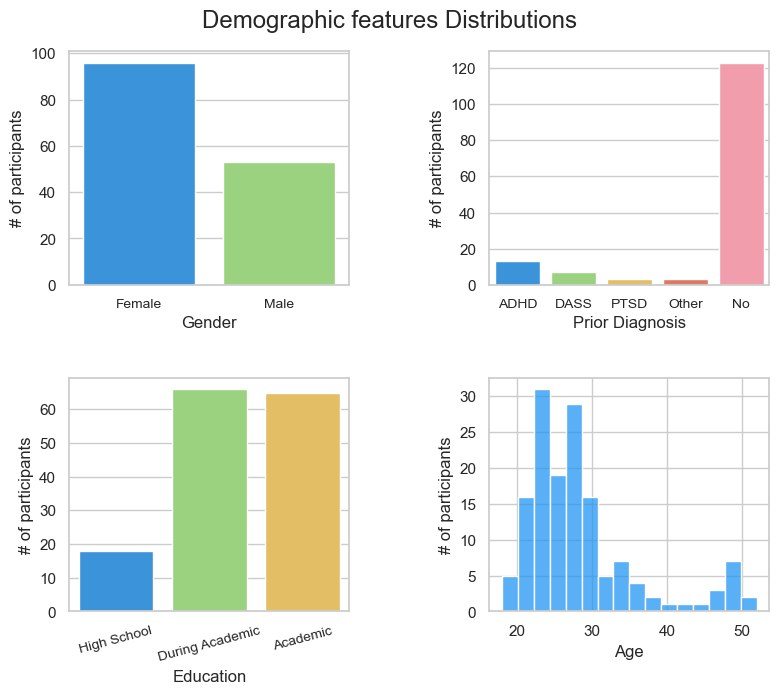

In [16]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, wspace=0.5, hspace=0.4)
fig.text(0.42,0.83,'Demographic features Distributions', ha='center', fontsize='x-large')

# define colors for the bars in the demo categories
demo_colors = ['#2196f3','#96E072','#f9c74f','#F26A4F','#FF8FA3']

ax1 = sns.barplot(data=gender_df,x=gender_df["Gender"],y=gender_df["Frequency"],ax=axs[0,0],palette=demo_colors)
ax2 = sns.barplot(data=prior_df, x=prior_df["Prior"],y=prior_df["Frequency"],ax=axs[0,1],palette=demo_colors)
ax3 = sns.barplot(data=education_df, x=education_df["Education"],y=education_df["Frequency"],ax=axs[1,0],palette=demo_colors)
ax4 = sns.histplot(demo_war_df['age'],ax=axs[1,1],color='#2196f3')

ax1.set_xticklabels(gender_df["Gender"],fontsize=10)
ax2.set_xticklabels(prior_df["Prior"],fontsize=10)
ax3.set_xticklabels(education_df['Education'],fontsize=10, rotation=15)

ax1.set(xlabel = 'Gender', ylabel='# of participants')
ax2.set(xlabel = 'Prior Diagnosis', ylabel='# of participants')
ax3.set(xlabel = 'Education', ylabel='# of participants')
ax4.set(xlabel = 'Age', ylabel='# of participants')


# War Experience

In [19]:
siren_dict = dict(demo_war_df['sirens'].value_counts())

siren_df = pd.DataFrame({"option":siren_dict.keys(),"size":siren_dict.values()})

reserve_dict = dict(demo_war_df['reserve_duty'].value_counts())
reserve_df = pd.DataFrame({"option":reserve_dict.keys(),"size":reserve_dict.values()})

news_dict = dict(demo_war_df['news_consumption'].value_counts())
news_df = pd.DataFrame({"option":news_dict.keys(),"size":news_dict.values()})

work_dict = dict(demo_war_df['work_changes'].value_counts())
work_df = pd.DataFrame({"option":work_dict.keys(),"size":work_dict.values()})

victims_dict = dict(demo_war_df['knows_victims'].value_counts())
victims_df = pd.DataFrame({"option":victims_dict.keys(),"size":victims_dict.values()})

worry_dict = dict(demo_war_df['worry_to_someone'].value_counts())
worry_df = pd.DataFrame({"option":worry_dict.keys(),"size":worry_dict.values()})

In [21]:
siren_ops = ['Not at all', 'Few', 'Between 2-3 times a week', 'Every day']
reserve_ops = ['No', 'Yes, I finished my reserve', 'Yes, I still serve']
news_ops = ['Not at all', 'Two hours max', 'Between 2 to 3 hours', 'At least 5 hours']
work_ops = ['Not at all', 'Slightly', 'Moderately', 'A lot','Extremely']
victims_ops = ['No', 'Yes']
worry_ops = ['No', 'Yes']


mapping = {op: i for i, op in enumerate(siren_ops)}
key = siren_df['option'].map(mapping)
siren_df = siren_df.iloc[key.argsort()]
print(siren_df)

mapping = {op: i for i, op in enumerate(reserve_ops)}
key = reserve_df['option'].map(mapping)
reserve_df = reserve_df.iloc[key.argsort()]

mapping = {op: i for i, op in enumerate(news_ops)}
key = news_df['option'].map(mapping)
news_df = news_df.iloc[key.argsort()]
print(news_df)

mapping = {op: i for i, op in enumerate(work_ops)}
key = work_df['option'].map(mapping)
work_df = work_df.iloc[key.argsort()]
print(work_df)

mapping = {op: i for i, op in enumerate(victims_ops)}
key = victims_df['option'].map(mapping)
victims_df = victims_df.iloc[key.argsort()]
print(victims_df)

mapping = {op: i for i, op in enumerate(worry_ops)}
key = worry_df['option'].map(mapping)
worry_df = worry_df.iloc[key.argsort()]
print(worry_df)

                     option  size
3                Not at all    10
2                       Few    36
1  Between 2-3 times a week    45
0                 Every day    58
                 option  size
1            Not at all    47
0         Two hours max    82
2  Between 2 to 3 hours    18
3      At least 5 hours     2
       option  size
2  Not at all    34
4    Slightly    15
3  Moderately    24
1       A lot    34
0   Extremely    40
  option  size
0     No   110
1    Yes    39
  option  size
1     No    43
0    Yes   106


/var/folders/wk/jg2bxmbj4h18w0rtwyjc8dvr0000gn/T/ipykernel_47053/2189267876.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reserve_df,x=reserve_df["option"],y=reserve_df["size"],ax=axs[0,0],palette=colors_warbar)
/var/folders/wk/jg2bxmbj4h18w0rtwyjc8dvr0000gn/T/ipykernel_47053/2189267876.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=reserve_df,x=reserve_df["option"],y=reserve_df["size"],ax=axs[0,0],palette=colors_warbar)
/var/folders/wk/jg2bxmbj4h18w0rtwyjc8dvr0000gn/T/ipykernel_47053/2189267876.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(['No', 'Yes, I finished \nmy reserve', 'Yes, I still serve'],rotation=50, ha='right',fontsize=10)
/var/

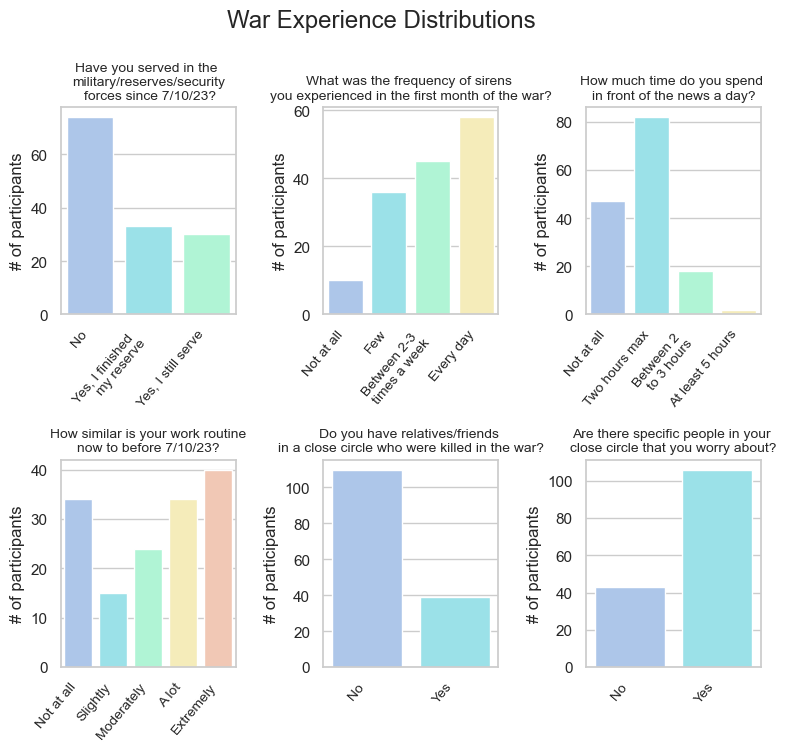

In [27]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2,3,figsize=(10,8))
fig.tight_layout(pad=1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, wspace=0.5, hspace=0.7)
fig.text(0.42,0.9,'War Experience Distributions', ha='center', fontsize='x-large')

x_labels = reserve_df["option"]
sns.barplot(data=reserve_df,x=reserve_df["option"],y=reserve_df["size"],ax=axs[0,0],palette=colors_warbar)
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('# of participants')
axs[0,0].set_xticklabels(['No', 'Yes, I finished \nmy reserve', 'Yes, I still serve'],rotation=50, ha='right',fontsize=10)
axs[0,0].set_title('Have you served in the \nmilitary/reserves/security\n forces since 7/10/23?')
axs[0,0].title.set_size(10)


x_labels = siren_df["option"]
sns.barplot(data=siren_df,x=siren_df["option"],y=siren_df["size"],ax=axs[0,1],palette=colors_warbar)
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('# of participants')
axs[0,1].set_xticklabels(['Not at all', 'Few', 'Between 2-3 \ntimes a week', 'Every day'],rotation=50, ha='right',fontsize=10)
axs[0,1].set_title('What was the frequency of sirens \nyou experienced in the first month of the war?')
axs[0,1].title.set_size(10)


x_labels = news_df["option"]
sns.barplot(data=news_df,x=news_df["option"],y=news_df["size"],ax=axs[0,2],palette=colors_warbar)
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('# of participants')
axs[0,2].set_xticklabels(['Not at all', 'Two hours max', 'Between 2 \nto 3 hours', 'At least 5 hours'],rotation=50, ha='right',fontsize=10)
axs[0,2].set_title('How much time do you spend \nin front of the news a day?')
axs[0,2].title.set_size(10)


x_labels = work_df["option"]
sns.barplot(data=work_df,x=work_df["option"],y=work_df["size"],ax=axs[1,0],palette=colors_warbar)
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('# of participants')
axs[1,0].set_xticklabels(x_labels,rotation=50, ha='right',fontsize=10)
axs[1,0].set_title('How similar is your work routine\nnow to before 7/10/23?')
axs[1,0].title.set_size(10)


x_labels = victims_df["option"]
sns.barplot(data=victims_df,x=victims_df["option"],y=victims_df["size"],ax=axs[1,1],palette=colors_warbar)
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('# of participants')
axs[1,1].set_xticklabels(x_labels,rotation=50, ha='right',fontsize=10)
axs[1,1].set_title('Do you have relatives/friends \nin a close circle who were killed in the war?')
axs[1,1].title.set_size(10)


x_labels = worry_df["option"]
sns.barplot(data=worry_df,x=worry_df["option"],y=worry_df["size"],ax=axs[1,2],palette=colors_warbar)
axs[1,2].set_xlabel('')
axs[1,2].set_ylabel('# of participants')
axs[1,2].set_xticklabels(x_labels,rotation=50, ha='right',fontsize=10)
axs[1,2].set_title('Are there specific people in your \nclose circle that you worry about?')
axs[1,2].title.set_size(10)

# Mental Health

In [30]:
# Scores levels that are fimiliar with the DASS questionnaires 

anxiety_score_dict = {'normal': (0,3), 
                      'mid': (4,5), 
                      'moderate': (6,7), 
                      'severe': (8,9),
                      'extremelySevere': (10,22)}

depression_score_dict = {'normal': (0,4), 
                         'mid': (5,6), 
                         'moderate': (7,10),
                         'severe': (11,13), 
                         'extremelySevere': (14,22)}

stress_score_dict = {'normal': (0,7), 
                     'mid': (8,9), 
                     'moderate': (10,12),
                     'severe': (13,16), 
                     'extremelySevere': (17,22)}
       

# I divided the cope score into three levels with 3 equal ranges 
cope_score_dict = {'low':(1,2), 
                    'mid': (2,3),
                    'high': (3,4)}


In [32]:
def find_levels(list,dict):
    # Initialize counts for each level
    level_counts = {level: 0 for level in dict}
    
    # Count scores falling into each level
    for score in list:
        for level, (lower, upper) in dict.items():
            if lower <= score <= upper:
                level_counts[level] += 1
                break  # Exit loop once the level is identified
    
    # Calculate percentages
    total_scores = len(list)
    level_percentages = {level: count / total_scores * 100 for level, count in level_counts.items()}
    # Extract labels and percentages for plotting
    labels = level_percentages.keys()
    sizes = level_percentages.values()
    
    return sizes,labels

In [34]:
anx_sizes,anx_labels = find_levels(subjective_df['anxiety'],anxiety_score_dict)
dep_sizes,dep_labels = find_levels(subjective_df['depression'],depression_score_dict)
str_sizes,str_labels = find_levels(subjective_df['stress'],stress_score_dict)

pcl_high_risk_count = subjective_df[subjective_df['pcl'] > 31].shape[0]
pcl_percentage_high_risk = (pcl_high_risk_count / len(subjective_df.dropna(subset=['pcl']))) * 100
pcl_labels = ['Without sever \ntrauma symptoms', 'Severe \ntrauma symptoms']
pcl_sizes = [100 - pcl_percentage_high_risk, pcl_percentage_high_risk]

asrs_high_risk_count = subjective_df[subjective_df['asrs'] > 51].shape[0]
asrs_percentage_high_risk = (asrs_high_risk_count / len(subjective_df.dropna(subset=['asrs']))) * 100
asrs_labels = ['Without \nsymptoms', 'With ADHD\n symptoms']
asrs_sizes = [100 - asrs_percentage_high_risk, asrs_percentage_high_risk]

prb_sizes,prb_labels = find_levels(subjective_df['problems'],cope_score_dict)
emt_sizes,emt_labels = find_levels(subjective_df['emotional'],cope_score_dict)
avd_sizes,avd_labels = find_levels(subjective_df['avoidance'],cope_score_dict)


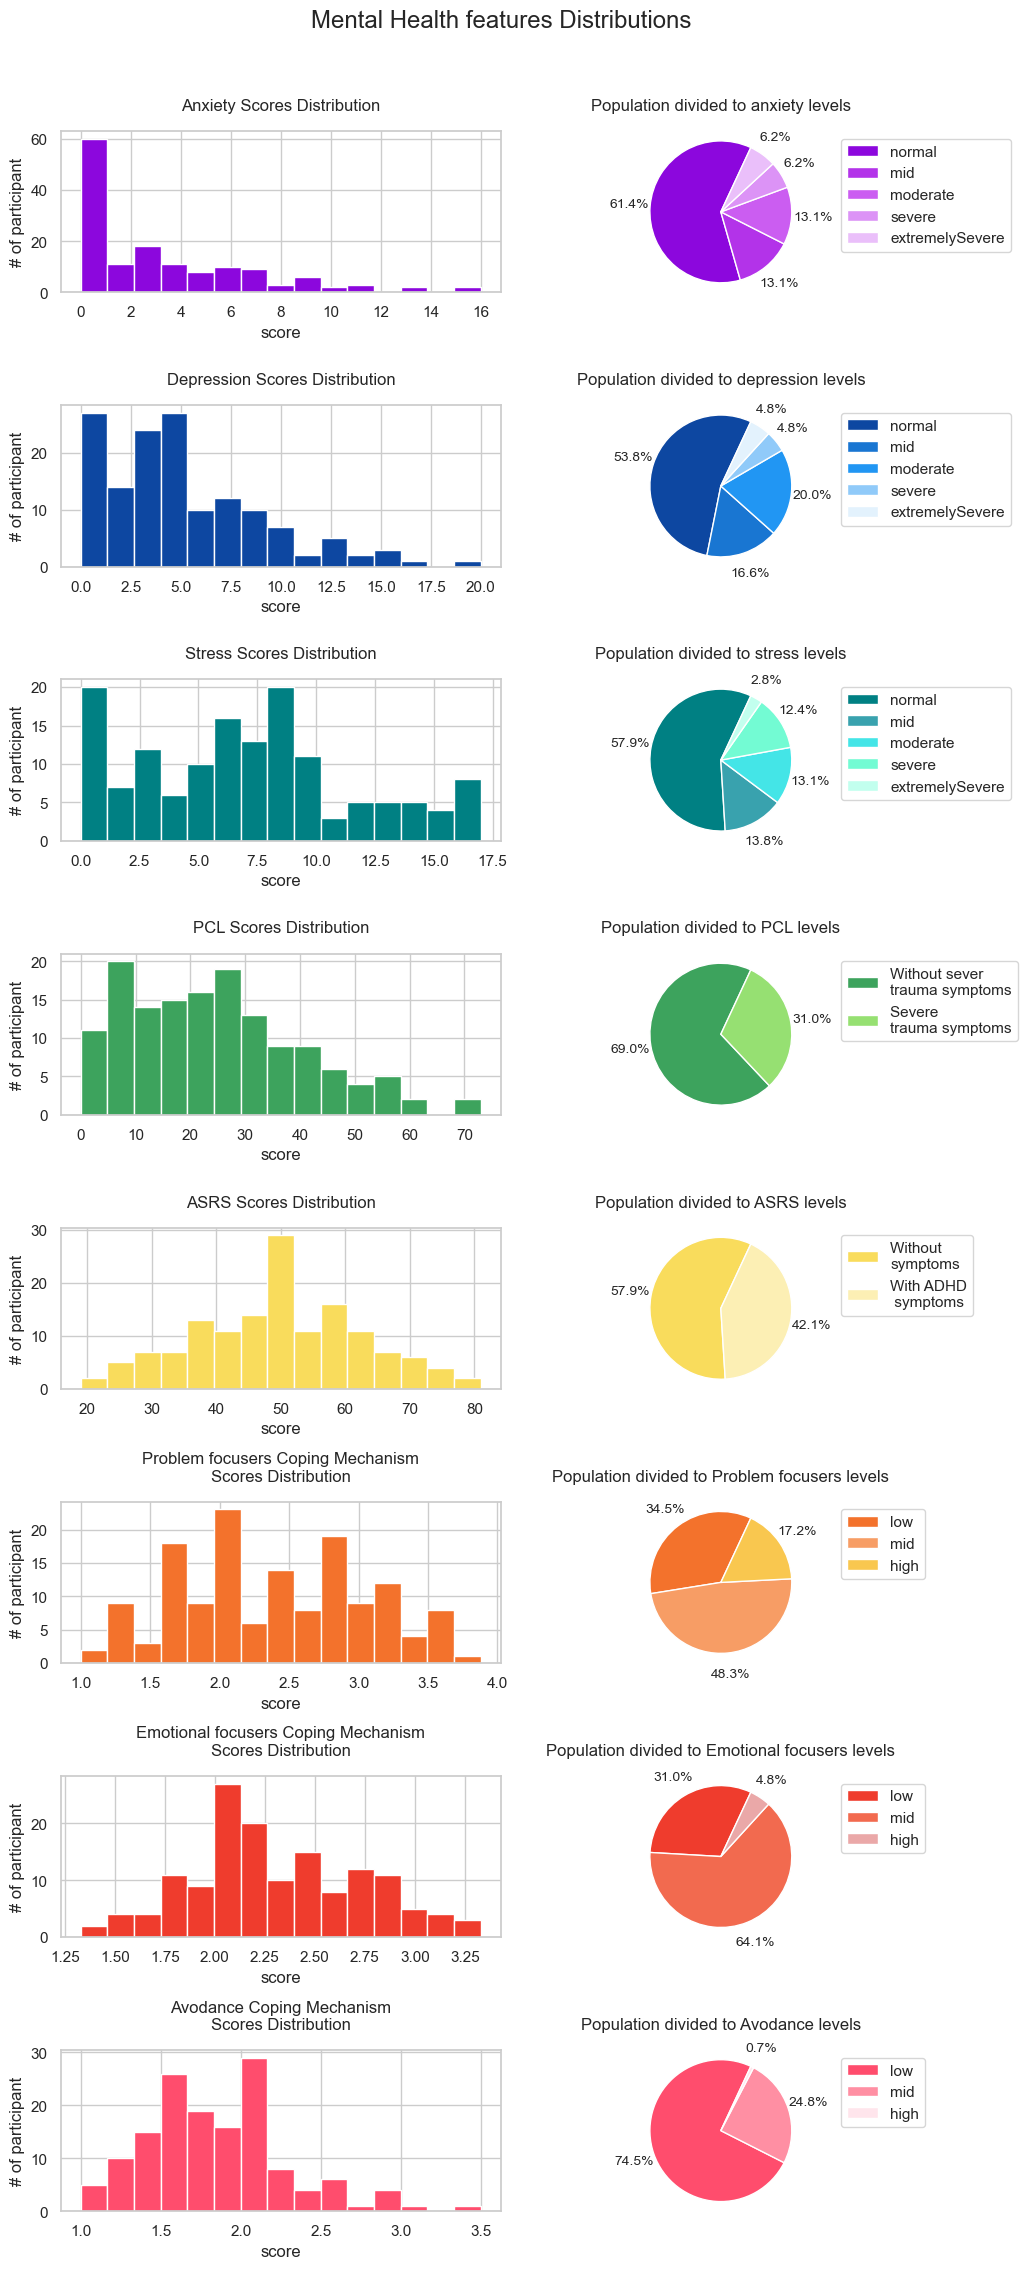

In [36]:
colors_pie = [colors[0],colors[2],colors[7],colors[8],colors[11]]
sns.set(style="whitegrid")
fig, axs = plt.subplots(8,2,figsize=(11,26))
fig.tight_layout(pad=2.5)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=0.7)
fig.text(0.5,0.94,'Mental Health features Distributions', ha='center', fontsize='x-large')

pad = 15
pctdistance = 1.3
radius = 1.1
startangle=65
#axs[0,0].hist(subjective_df['anxiety'], bins=15, ec='white',color=colors[0])
axs[0,0].hist(subjective_df['anxiety'], bins=15, ec='white',color=mental_color['purple'][0])
axs[0,0].set_xlabel('score')
axs[0,0].set_ylabel('# of participant')
axs[0,0].set_title('Anxiety Scores Distribution',pad=pad)
axs[0,1].pie(anx_sizes, autopct='%1.1f%%', pctdistance=pctdistance, colors=mental_color['purple'],
             radius=radius,textprops={'size': 'smaller'}, startangle=startangle)
axs[0,1].set_title('Population divided to anxiety levels',pad=pad)
axs[0,1].legend(loc="best", bbox_to_anchor=(1.2,1), labels=anx_labels)

axs[1,0].hist(subjective_df['depression'], bins=15, ec='white',color=mental_color['blue'][0])
axs[1,0].set_xlabel('score')
axs[1,0].set_ylabel('# of participant')
axs[1,0].set_title('Depression Scores Distribution',pad=pad)
axs[1,1].pie(dep_sizes, autopct='%1.1f%%', pctdistance=pctdistance, colors=mental_color['blue'],radius=radius,
             textprops={'size': 'smaller'}, startangle=startangle)
axs[1,1].set_title('Population divided to depression levels',pad=pad)
axs[1,1].legend(loc="best", bbox_to_anchor=(1.2,1), labels=dep_labels)

axs[2,0].hist(subjective_df['stress'], bins=15, ec='white',color=mental_color['turquoise'][0])
axs[2,0].set_xlabel('score')
axs[2,0].set_ylabel('# of participant')
axs[2,0].set_title('Stress Scores Distribution',pad=pad)
axs[2,1].pie(str_sizes, autopct='%1.1f%%', pctdistance=pctdistance, colors=mental_color['turquoise'],radius=radius,
             textprops={'size': 'smaller'}, startangle=startangle)
axs[2,1].set_title('Population divided to stress levels',pad=pad)
axs[2,1].legend(loc="best", bbox_to_anchor=(1.2,1), labels=str_labels)

axs[3,0].hist(subjective_df['pcl'], bins=15, ec='white',color=mental_color['green'][0])
axs[3,0].set_xlabel('score')
axs[3,0].set_ylabel('# of participant')
axs[3,0].set_title('PCL Scores Distribution',pad=pad)
axs[3,1].pie(pcl_sizes, autopct='%1.1f%%', pctdistance=pctdistance, colors=mental_color['green'],radius=radius,
             textprops={'size': 'smaller'}, startangle=startangle)
axs[3,1].set_title('Population divided to PCL levels',pad=pad)
axs[3,1].legend(loc="best", bbox_to_anchor=(1.2,1), labels=pcl_labels)

axs[4,0].hist(subjective_df['asrs'], bins=15, ec='white',color=mental_color['yellow'][0])
axs[4,0].set_xlabel('score')
axs[4,0].set_ylabel('# of participant')
axs[4,0].set_title('ASRS Scores Distribution',pad=pad)
axs[4,1].pie(asrs_sizes, autopct='%1.1f%%', pctdistance=pctdistance, colors=mental_color['yellow'],radius=radius,
             textprops={'size': 'smaller'}, startangle=startangle)
axs[4,1].set_title('Population divided to ASRS levels',pad=pad)
axs[4,1].legend(loc="best", bbox_to_anchor=(1.2,1), labels=asrs_labels)

axs[5,0].hist(subjective_df['problems'], bins=15, ec='white',color=mental_color['orange'][0])
axs[5,0].set_xlabel('score')
axs[5,0].set_ylabel('# of participant')
axs[5,0].set_title('Problem focusers Coping Mechanism\nScores Distribution',pad=pad)
axs[5,1].pie(prb_sizes, autopct='%1.1f%%', pctdistance=pctdistance, colors=mental_color['orange'],radius=radius,
             textprops={'size': 'smaller'}, startangle=startangle)
axs[5,1].set_title('Population divided to Problem focusers levels',pad=pad)
axs[5,1].legend(loc="best", bbox_to_anchor=(1.2,1), labels=prb_labels)

axs[6,0].hist(subjective_df['emotional'], bins=15, ec='white',color=mental_color['red'][0])
axs[6,0].set_xlabel('score')
axs[6,0].set_ylabel('# of participant')
axs[6,0].set_title('Emotional focusers Coping Mechanism\nScores Distribution',pad=pad)
axs[6,1].pie(emt_sizes, autopct='%1.1f%%', pctdistance=pctdistance, colors=mental_color['red'],radius=radius,
             textprops={'size': 'smaller'}, startangle=startangle)
axs[6,1].set_title('Population divided to Emotional focusers levels',pad=pad)
axs[6,1].legend(loc="best", bbox_to_anchor=(1.2,1), labels=emt_labels)

axs[7,0].hist(subjective_df['avoidance'], bins=15, ec='white',color=mental_color['pink'][0])
axs[7,0].set_xlabel('score')
axs[7,0].set_ylabel('# of participant')
axs[7,0].set_title('Avodance Coping Mechanism\nScores Distribution',pad=pad)
axs[7,1].pie(avd_sizes, autopct='%1.1f%%', pctdistance=pctdistance, colors=mental_color['pink'],radius=radius,
             textprops={'size': 'smaller'}, startangle=startangle)
axs[7,1].set_title('Population divided to Avodance levels',pad=pad)
axs[7,1].legend(loc="best", bbox_to_anchor=(1.2,1), labels=avd_labels)


# Computerized Task

In [39]:
means_rts = objective_df['mean_RT']
means_rts = means_rts.dropna()

accurecies = objective_df['accuracy']
accurecies = accurecies.dropna()
phasic_alertness_dist = objective_df['phasic_alertness']
phasic_alertness_dist = phasic_alertness_dist.dropna()
executive_control_dist = objective_df['executive_control']
executive_control_dist = executive_control_dist.dropna()


Text(0.5, 1.0, 'Executive Control = Con_RT - Incon_RT\n Distribution')

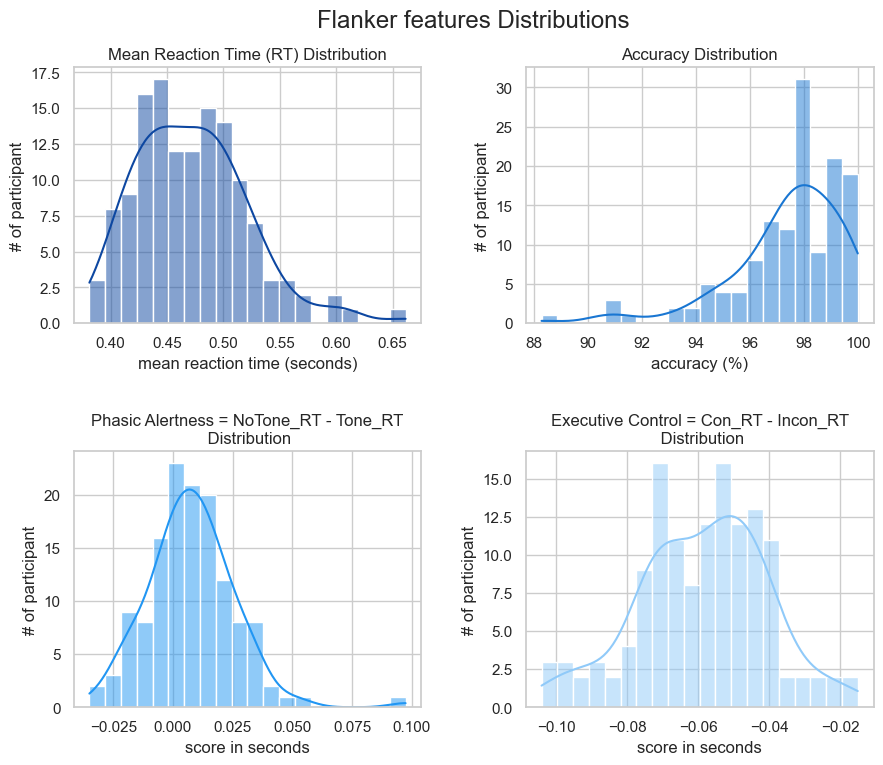

In [41]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=2.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)
fig.text(0.5,0.95,'Flanker features Distributions', ha='center', fontsize='x-large')

sns.histplot(objective_df['mean_RT'], bins=20, ec='white',color=mental_color['blue'][0],kde=True, ax=axs[0,0])
#axs[0,0].hist(objective_df['mean_RT'], bins=20, ec='white',color=colors[0])
axs[0,0].set_xlabel('mean reaction time (seconds)')
axs[0,0].set_ylabel('# of participant')
axs[0,0].set_title('Mean Reaction Time (RT) Distribution')

sns.histplot(objective_df['accuracy'], bins=20, ec='white',color=mental_color['blue'][1],kde=True, ax=axs[0,1])
#axs[0,1].hist(objective_df['accuracy'], bins=20, ec='white',color=colors[1])
axs[0,1].set_xlabel('accuracy (%)')
axs[0,1].set_ylabel('# of participant')
axs[0,1].set_title('Accuracy Distribution')

sns.histplot(objective_df['phasic_alertness'], bins=20, ec='white',color=mental_color['blue'][2],kde=True, ax=axs[1,0])
#axs[1,0].hist(objective_df['phasic_alertness'], bins=20, ec='white',color=color=mental_colors['blue'][1])
axs[1,0].set_xlabel('score in seconds')
axs[1,0].set_ylabel('# of participant')
axs[1,0].set_title('Phasic Alertness = NoTone_RT - Tone_RT\n Distribution')

sns.histplot(objective_df['executive_control'], bins=20, ec='white',color=mental_color['blue'][3],kde=True, ax=axs[1,1])
#axs[1,1].hist(objective_df['executive_control'], bins=20, ec='white', color=colors[3])
axs[1,1].set_xlabel('score in seconds')
axs[1,1].set_ylabel('# of participant')
axs[1,1].set_title('Executive Control = Con_RT - Incon_RT\n Distribution')